# Human Activity Recogniton with Deep Learning and Image Augmentation using Keras

### Contributors: Kalam Park, Kira Fleischer, Abe Torok, Cray Minor

### References and Data: 

Karen Simonyan, Andrew Zisserman: https://arxiv.org/pdf/1409.1556.pdf

Dataset: https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset

## Code 

#### Import necessary packages and libraries

In [1]:
import pandas as pd 
import numpy as np
from numpy import random
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, img_to_array, load_img 
from keras.callbacks import EarlyStopping 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from matplotlib import pyplot as plt
from PIL import Image as im

In [2]:
train_df = pd.read_csv("Training_set.csv")
test_df = pd.read_csv("Testing_set.csv")

In [3]:
train_df

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [4]:
train_df["label"].unique()

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [5]:
img_train = []
img_label = []
img_test = []
img_hold = []

In [6]:
def load_data(dataset, train_test_check):
    if train_test_check == 1:
        folder = 'train/'
    else:
        folder = 'test/'
    for i in range(len(dataset)):
        img = folder+dataset["filename"][i]
        img = load_img(img, target_size=(128,128))
        img = img_to_array(img)
        img_hold.append(img)
        if train_test_check == 1:
            img_label.append(dataset["label"][i])
    return img_hold


In [7]:
img_train = load_data(train_df, 1)
img_test = load_data(test_df, 0)

In [8]:
img_train_hold = img_train
img_train = np.array(img_train)
img_train.shape

(18000, 128, 128, 3)

In [9]:
img_label_hold = img_label
img_label = np.array(img_label)
img_label.shape

(12600,)

clapping


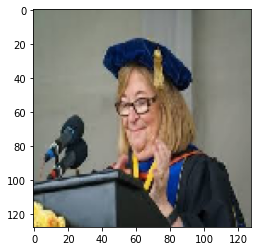

In [10]:
# Check to see if train image and label arrays correspond to eachother
x = random.randint(100)
print(img_label[x])
image = im.fromarray(np.uint8(img_train[x]))
plt.imshow(image)

In [11]:
#use LabelEncoder to turn non-numerical classses (image labels) to numercal labels
encoded_labels = LabelEncoder()
#compute mean/std div for each of the given features to scale. Then apply the transformation to the given array
img_label = encoded_labels.fit_transform(img_label)

In [12]:

img_label = to_categorical(img_label)
print(img_label[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(img_train,img_label, test_size=0.33, random_state=42)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8442, 128, 128, 3)
(4158, 128, 128, 3)
(8442, 15)
(4158, 15)


In [15]:
input_shape = (128,128,3)
#initialize a cnn model
model = keras.Sequential()
#add layers
vgg_model = keras.applications.VGG16(include_top=False,
                   input_shape=(128,128,3),
                   pooling='avg',classes=15,
                   weights='imagenet')
for layer in vgg_model.layers:
        layer.trainable=False
model.add(vgg_model)
model.add(Flatten()) # flattening layer
model.add(Dense(units=512,activation="relu")) #fully connected layer
model.add(Dense(units=15,activation="softmax")) #output layer

#compile the cnn model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape)

58900480/58889256 [==============================] - 0s 0us/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
hist = model.fit(x_train,y_train,epochs=80)

Epoch 1/80
264/264 [==============================] - 19s 30ms/step - loss: 3.0075 - accuracy: 0.3810
Epoch 2/80
264/264 [==============================] - 8s 29ms/step - loss: 1.3090 - accuracy: 0.5856
Epoch 3/80
264/264 [==============================] - 8s 29ms/step - loss: 0.9134 - accuracy: 0.7017
Epoch 4/80
264/264 [==============================] - 8s 29ms/step - loss: 0.6141 - accuracy: 0.7952
Epoch 5/80
264/264 [==============================] - 8s 29ms/step - loss: 0.3684 - accuracy: 0.8898
Epoch 6/80
264/264 [==============================] - 8s 29ms/step - loss: 0.2181 - accuracy: 0.9410
Epoch 7/80
264/264 [==============================] - 8s 29ms/step - loss: 0.1307 - accuracy: 0.9701
Epoch 8/80
264/264 [==============================] - 8s 29ms/step - loss: 0.0821 - accuracy: 0.9835
Epoch 9/80
264/264 [==============================] - 8s 29ms/step - loss: 0.0579 - accuracy: 0.9889
Epoch 10/80
264/264 [==============================] - 8s 29ms/step - loss: 0.0637 - accur

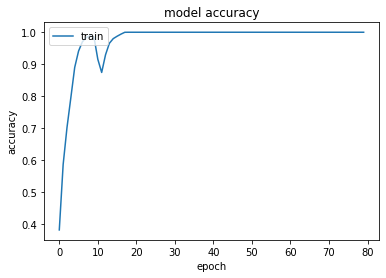

In [18]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

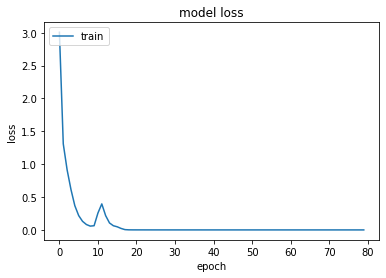

In [19]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
model.save("human_act_model.h5")

In [21]:
from google.colab import files
files.download("human_act_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
y_preds = model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, log_loss
print("log_loss:{}, accuracy_score:{}".format(log_loss(np.round
(y_preds),y_test),accuracy_score(np.round(y_preds),y_test)))

log_loss:15.765896489380529, accuracy_score:0.5209235209235209


In [24]:
from PIL import Image
import matplotlib.image as img

In [25]:
classes = encoded_labels.classes_

In [26]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((128,128)))

In [27]:
def test_predict(test_image):
    result = model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = classes[itemindex[1][0]]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

probability: 77.1264910697937%
Predicted class :  sleeping


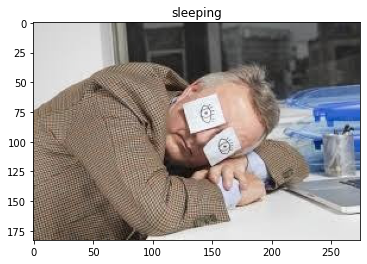

In [30]:
test_predict('test/Image_500.jpg')

probability: 100.0%
Predicted class :  drinking


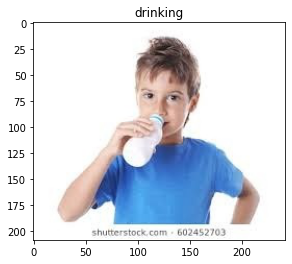

In [29]:
test_predict('test/Image_101.jpg')

probability: 100.0%
Predicted class :  running


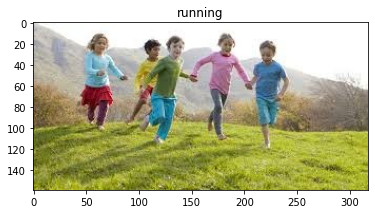

In [33]:
test_predict('test/Image_345.jpg')

probability: 99.99500513076782%
Predicted class :  dancing


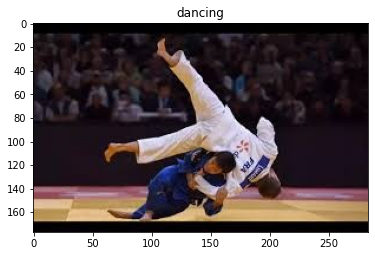

In [37]:
test_predict('test/Image_553.jpg')